In [53]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [54]:
#data synthetic
def synthetic_data(w,b,num_examples):#mat,mat,number of examples
    x=torch.normal(0,1,(num_examples,len(w)))
    y=torch.matmul(x,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape((-1,1))

true_w=torch.tensor([2,-3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)


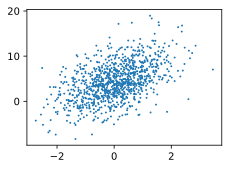

In [55]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(),labels.detach().numpy(),1)

In [56]:
#读取数据值
def data_iter(batch_size,feature,labels):
    num_examples=len(feature)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

In [57]:
batch_size=10

for x,y in data_iter(batch_size,features,labels):
    print(x,'\n',y)
    break

tensor([[-0.6411,  1.1625],
        [ 1.0207,  0.6224],
        [ 1.2829, -1.4808],
        [-0.6232, -2.7541],
        [ 2.3652, -1.9192],
        [-1.1068, -1.5244],
        [ 0.3385,  0.5973],
        [-0.1845,  1.2051],
        [ 0.3769,  1.5831],
        [ 0.5423, -0.6804]]) 
 tensor([[-1.0472],
        [ 4.1201],
        [11.7938],
        [12.3156],
        [15.4383],
        [ 7.1739],
        [ 2.8536],
        [-0.2686],
        [-0.4349],
        [ 7.6053]])


In [58]:
w=torch.normal(0,0.1,size=(2,1),requires_grad=True)
b=torch.zeros((1),requires_grad=True)

In [59]:
def linear(x,w,b):
    return torch.matmul(x,w)+b 

In [60]:
def squared_loss(y_hat, y):  #@save
    return ((y_hat - y.reshape(y_hat.shape)) ** 2 / 2).sum()

In [61]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for i in params:
            i.data-=lr/batch_size*i.grad
            i.grad.zero_()

In [62]:
lr = 0.03
num_epochs = 3
net = linear
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # `X`和`y`的小批量损失
        # 因为`l`形状是(`batch_size`, 1)，而不是一个标量。`l`中的所有元素被加到一起，
        # 并以此计算关于[`w`, `b`]的梯度
        l.backward()#backward之后,requird_grad为True的参数就会计算所累计的梯度
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数,优化函数
    with torch.no_grad():#测试所得到的权重和偏置的质量
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l):f}')

epoch 1, loss 27.378046
tensor([[0.],
        [0.]])
tensor([[0.],
        [0.]])
epoch 1, loss 27.378046
epoch 2, loss 0.095917
tensor([[0.],
        [0.]])
tensor([[0.],
        [0.]])
epoch 2, loss 0.095917
epoch 3, loss 0.051075
tensor([[0.],
        [0.]])
tensor([[0.],
        [0.]])
epoch 3, loss 0.051075


In [63]:
w,b

(tensor([[ 1.9997],
         [-3.4001]], requires_grad=True),
 tensor([4.2005], requires_grad=True))